In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Stations = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [10]:
inspector = inspect(engine)

In [11]:
#get data types for each column in Measurement
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# Total dates (includes multiple date counts for different stations)
session.query(func.count(Measurement.date)).all()

[(19550)]

In [13]:
#find the most recent date (advanved SQL day 3, dates activity)
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date

('2017-08-23')

In [14]:
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print('One year prior: ', prev_year)

One year prior:  2016-08-23


In [15]:
measurement_data = [Measurement.station, Measurement.date, Measurement.prcp]

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
#sqlalcnehmy day 3, student date activity and student dates (DOW activity)

precip = session.query(*measurement_data).\
    filter(Measurement.date> prev_year).\
    order_by(Measurement.date).all()
precip

[('USC00519397', '2016-08-24', 0.08),
 ('USC00513117', '2016-08-24', 2.15),
 ('USC00514830', '2016-08-24', 2.28),
 ('USC00517948', '2016-08-24', None),
 ('USC00519523', '2016-08-24', 1.22),
 ('USC00519281', '2016-08-24', 2.15),
 ('USC00516128', '2016-08-24', 1.45),
 ('USC00519397', '2016-08-25', 0.08),
 ('USC00513117', '2016-08-25', 0.08),
 ('USC00514830', '2016-08-25', 0.0),
 ('USC00517948', '2016-08-25', 0.0),
 ('USC00519523', '2016-08-25', 0.21),
 ('USC00519281', '2016-08-25', 0.06),
 ('USC00516128', '2016-08-25', 0.11),
 ('USC00519397', '2016-08-26', 0.0),
 ('USC00513117', '2016-08-26', 0.03),
 ('USC00514830', '2016-08-26', 0.02),
 ('USC00517948', '2016-08-26', 0.04),
 ('USC00519523', '2016-08-26', 0.0),
 ('USC00519281', '2016-08-26', 0.01),
 ('USC00519397', '2016-08-27', 0.0),
 ('USC00513117', '2016-08-27', 0.18),
 ('USC00514830', '2016-08-27', 0.02),
 ('USC00519523', '2016-08-27', 0.0),
 ('USC00519281', '2016-08-27', 0.12),
 ('USC00516128', '2016-08-27', None),
 ('USC00519397', '

In [17]:
#upack tuples to create pandas dataframe (advanced SQL day 2, emoji activity)
date = [result[1] for result in precip[::]]
prcp = [result[2] for result in precip[::]]

In [18]:
#pandas lession, day: 1, activity: student training grounds
#how to set index: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html
precip_df = pd.DataFrame({"Date":date, "Precipitation":prcp})
precip_df.head(10)

,Date,Precipitation
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
5,2016-08-24,2.15
6,2016-08-24,1.45
7,2016-08-25,0.08
8,2016-08-25,0.08
9,2016-08-25,0.00


In [19]:
precip_df.to_dict()

{'Date': {0: '2016-08-24',
  1: '2016-08-24',
  2: '2016-08-24',
  3: '2016-08-24',
  4: '2016-08-24',
  5: '2016-08-24',
  6: '2016-08-24',
  7: '2016-08-25',
  8: '2016-08-25',
  9: '2016-08-25',
  10: '2016-08-25',
  11: '2016-08-25',
  12: '2016-08-25',
  13: '2016-08-25',
  14: '2016-08-26',
  15: '2016-08-26',
  16: '2016-08-26',
  17: '2016-08-26',
  18: '2016-08-26',
  19: '2016-08-26',
  20: '2016-08-27',
  21: '2016-08-27',
  22: '2016-08-27',
  23: '2016-08-27',
  24: '2016-08-27',
  25: '2016-08-27',
  26: '2016-08-28',
  27: '2016-08-28',
  28: '2016-08-28',
  29: '2016-08-28',
  30: '2016-08-28',
  31: '2016-08-28',
  32: '2016-08-29',
  33: '2016-08-29',
  34: '2016-08-29',
  35: '2016-08-29',
  36: '2016-08-29',
  37: '2016-08-29',
  38: '2016-08-29',
  39: '2016-08-30',
  40: '2016-08-30',
  41: '2016-08-30',
  42: '2016-08-30',
  43: '2016-08-30',
  44: '2016-08-30',
  45: '2016-08-31',
  46: '2016-08-31',
  47: '2016-08-31',
  48: '2016-08-31',
  49: '2016-08-31',
  

In [20]:
#pandas lession, day: 1, activity: student training grounds
#how to set index: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html
precip_df = pd.DataFrame({"Date":date, "Precipitation":prcp})
precip_df.head(10)

,Date,Precipitation
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
5,2016-08-24,2.15
6,2016-08-24,1.45
7,2016-08-25,0.08
8,2016-08-25,0.08
9,2016-08-25,0.00


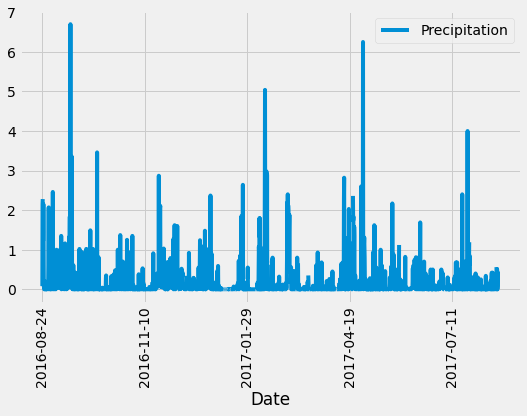

In [39]:
precip_df.plot(x="Date", y="Precipitation",rot=90, figsize = (8, 5))

In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
precip_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [22]:
#get data types for each column in Station
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [23]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(func.count(Stations.station)).all()
print(f'There are {station_count} stations')

There are [(9,)] stations


In [24]:
#print all station names
stations = session.query(Stations)
for station in stations:
    print(station.station)

USC00519397
USC00513117
USC00514830
USC00517948
USC00518838
USC00519523
USC00519281
USC00511918
USC00516128


In [25]:
station_query = [Measurement.station, func.count(Measurement.date), func.min(Measurement.tobs),\
                 func.max(Measurement.tobs), func.avg(Measurement.tobs)]

In [26]:
#find the most active station (include count, date, min, max, average)
station_count = session.query(*station_query).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.date).desc()).all()
station_count

[('USC00519281', 2772, 54.0, 85.0, 71.66378066378067),
 ('USC00519397', 2724, 56.0, 87.0, 74.55323054331865),
 ('USC00513117', 2709, 59.0, 85.0, 72.68918420081211),
 ('USC00519523', 2669, 56.0, 85.0, 74.5436493068565),
 ('USC00516128', 2612, 58.0, 84.0, 70.91500765696784),
 ('USC00514830', 2202, 58.0, 85.0, 74.8732970027248),
 ('USC00511918', 1979, 53.0, 87.0, 71.61596766043456),
 ('USC00517948', 1372, 58.0, 87.0, 74.68440233236151),
 ('USC00518838', 511, 58.0, 83.0, 72.72407045009784)]

In [27]:
#upack tuples (advanced SQL day 2, emoji activity)
station = [result[0] for result in station_count[::]]
activity = [result[1] for result in station_count[::]]
min_temp = [result[2] for result in station_count[::]]
max_temp = [result[3] for result in station_count[::]]
avg_temp = [result[4] for result in station_count[::]]


In [28]:
station_df = pd.DataFrame({"Station":station, "Activity":activity, "Min Temp": min_temp, "Max Temp": max_temp, "Avg Temp": avg_temp}).set_index('Station')
station_df.head(9)

,Activity,Min Temp,Max Temp,Avg Temp
Station,,,,
USC00519281,2772,54.0,85.0,71.663781
USC00519397,2724,56.0,87.0,74.553231
USC00513117,2709,59.0,85.0,72.689184
USC00519523,2669,56.0,85.0,74.543649
USC00516128,2612,58.0,84.0,70.915008
USC00514830,2202,58.0,85.0,74.873297
USC00511918,1979,53.0,87.0,71.615968
USC00517948,1372,58.0,87.0,74.684402
USC00518838,511,58.0,83.0,72.724070


In [29]:
# try to do the above, but only for the first row

In [30]:
# Using the most active station id from above
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_data = session.query(Measurement.tobs).\
    filter(Measurement.date>= prev_year).\
    filter(Measurement.station == 'USC00519281').\
    order_by((Measurement.date).desc()).all()
station_data

[(79.0),
 (76.0),
 (76.0),
 (77.0),
 (77.0),
 (77.0),
 (83.0),
 (82.0),
 (77.0),
 (76.0),
 (81.0),
 (82.0),
 (81.0),
 (76.0),
 (75.0),
 (77.0),
 (75.0),
 (82.0),
 (77.0),
 (77.0),
 (77.0),
 (76.0),
 (76.0),
 (76.0),
 (80.0),
 (80.0),
 (76.0),
 (74.0),
 (74.0),
 (72.0),
 (69.0),
 (78.0),
 (78.0),
 (75.0),
 (74.0),
 (77.0),
 (78.0),
 (76.0),
 (81.0),
 (79.0),
 (76.0),
 (76.0),
 (77.0),
 (76.0),
 (73.0),
 (71.0),
 (77.0),
 (72.0),
 (72.0),
 (74.0),
 (72.0),
 (72.0),
 (75.0),
 (79.0),
 (73.0),
 (75.0),
 (74.0),
 (76.0),
 (74.0),
 (74.0),
 (74.0),
 (72.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (77.0),
 (76.0),
 (76.0),
 (80.0),
 (75.0),
 (72.0),
 (74.0),
 (80.0),
 (74.0),
 (74.0),
 (74.0),
 (74.0),
 (71.0),
 (71.0),
 (74.0),
 (76.0),
 (68.0),
 (69.0),
 (74.0),
 (74.0),
 (74.0),
 (77.0),
 (76.0),
 (75.0),
 (70.0),
 (74.0),
 (67.0),
 (70.0),
 (75.0),
 (79.0),
 (70.0),
 (75.0),
 (70.0),
 (75.0),
 (65.0),
 (60.0),
 (72.0),
 (67.0),
 (70.0),
 (74.0),
 (72.0),
 (68.0),
 (76.0),
 (72.0),
 (69.0),
 

In [31]:
#upack tuples (advanced SQL day 2, emoji activity)
tobs_hist = [result[0] for result in station_data[::]]

In [32]:
station_hist_df = pd.DataFrame({"Temperature": tobs_hist})
station_hist_df.head()

,Temperature
0,79.0
1,76.0
2,76.0
3,77.0
4,77.0


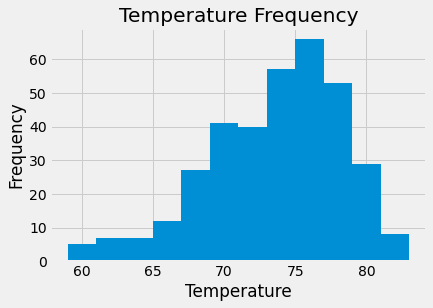

In [33]:
#created histogram (used SQL bonus challenge for reference)
#binning/histograph: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.hist.html
station_hist_df.hist(bins = 12)
plt.title("Temperature Frequency")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.savefig("./Images/temp_histogram.png")
plt.show()

# Close session

In [34]:
# Close Session
session.close()